In [3]:
#Importing The Required Libraries
import numpy as np 
import pandas as pd

In [4]:
dataset=pd.read_csv('Groceries.csv',header=None)

In [5]:
pd.pandas.set_option('display.max_column',None)

In [6]:
dataset.shape

(9002, 32)

***Training association rule models (Apriori and ECLAT) to find the most related items bought by customers of a french supermarket during a week. All records of the dataset represent items bought by an unique customer, during this week.***

This algorithm associate products preferences by most of the customers and can be used to generate products recommendation and help on displaying products strategy.

In [7]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


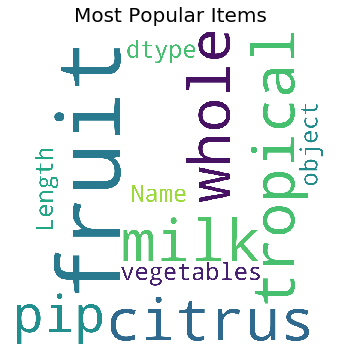

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud,STOPWORDS

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (6, 6)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121,stopwords=STOPWORDS.add("NaN")).generate(str(dataset[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

In [9]:
#Adding all transactions into list of lists..
groceries=[]
for i in range(0,3000):
    groceries.append([str(dataset.values[i,j]) for j in range(0,10)])
    
    

In [10]:
groceries[4:5] #Sampke Of Grocery

[['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan']]

In [11]:
#Training Apriori on the dataset
from apyori import apriori
association_rules=apriori(groceries,min_support=0.0025,min_confidence=0.20,min_lift=3,min_length=2)

In [12]:
results=list(association_rules)

In [13]:
results[:1]

[RelationRecord(items=frozenset({'margarine', 'baking powder'}), support=0.004, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'margarine'}), confidence=0.25531914893617025, lift=4.453240969816923)])]

In [14]:
lift=[]
association_items=[]
for i in range(0,len(results)):
    lift.append(results[:len(results)][i][2][0][3])
    association_items.append(list(results[:len(results)][i][0]))

In [15]:
#Putting it all together in a dataframe
final_groceries=pd.DataFrame([association_items,lift]).T
final_groceries.columns=['Association Items','Lift']

In [16]:
#TOp 10 highest lift scores
final_groceries.sort_values('Lift',ascending=False).head(10)

,Association Items,Lift
267,"[sausage, yogurt, bottled water, soda]",15.7895
325,"[pip fruit, other vegetables, dessert, yogurt]",14.4385
290,"[cream cheese , whole milk, domestic eggs, cit...",14.026
328,"[whipped/sour cream, other vegetables, dessert...",13.3185
288,"[tropical fruit, other vegetables, chicken, ro...",12.2727
320,"[pip fruit, curd, yogurt, tropical fruit]",11.2202
326,"[sausage, other vegetables, dessert, yogurt]",11.0294
243,"[processed cheese, whole milk, white bread]",10.9091
393,"[canned beer, rolls/buns, soda, nan, shopping ...",10.4621
327,"[tropical fruit, other vegetables, dessert, yo...",10.2302


In [18]:
#TOp 10 lowest lift scores
final_groceries.sort_values('Lift',ascending=False).tail(10)

,Association Items,Lift
360,"[pip fruit, tropical fruit, other vegetables, ...",3.0303
121,"[coffee, other vegetables, margarine]",3.01811
182,"[other vegetables, grapes, yogurt]",3.01811
208,"[tropical fruit, other vegetables, meat]",3.01811
297,"[pip fruit, other vegetables, whole milk, citr...",3.01811
249,"[sausage, yogurt, soda]",3.01326
85,"[butter milk, other vegetables, yogurt]",3.01205
1,"[pip fruit, baking powder]",3.01084
33,"[whipped/sour cream, beef, other vegetables]",3.0025
57,"[fruit/vegetable juice, bottled water, soda]",3.00092


In [16]:
#From All this we can infer that "Soda , Yogurt , Sausage and Bottled Water " are the most common combined items.

Considering the above results, we can infer that
lift of 15.785 tells us that "soda" is more likely to be bought by all customers who buy "bottled water,sausage or yogurt" 

**Eclat Implementation**

It calculate the pairs that have been bought more frequently comparing to other pairs. At the end, we expect to see what is the most common combination of products during the week.

In [14]:
#Eclat Implementation
#getting the products bought by customers...

groceriess=[]
for i in range(0,len(groceries)):
    groceriess.extend(groceries[i])
    
#Finding Unique items from differennt transactions and removing Nan
uniqueItems=list(set(groceriess))
uniqueItems.remove('nan')
    


In [15]:
# Creating Combinations with items-pairs....
pairs=[]
for j in range(0,len(uniqueItems)):
    k=1;
    while(k<len(uniqueItems)):
        try:
            pairs.append([uniqueItems[j],uniqueItems[j+k]])
        except IndexError:
            pass
        k=k+1;
            

In [16]:
uniqueItems[:6] #Sample Result after removing nans

['tea', 'zwieback', 'soft cheese', 'canned beer', 'softener', 'baking powder']

In [17]:
#Calculating Score for each Item-pairs...
score=[]
for i in pairs:
    cond=[]
    for item in i:
        cond.append('("%s") in s' %item)
    x = ('[s for s in groceries if ' + ' and '.join(cond) + ']')    
    score.append(len(eval(x))/3000.0)

In [18]:
Eclat_results = pd.DataFrame([pairs, score]).T
Eclat_results.columns = ['Pairs', 'Score']

In [19]:
Eclat_results.sort_values('Score',ascending=False).head(10)

,Pairs,Score
2697,"[other vegetables, whole milk]",0.072
6525,"[rolls/buns, whole milk]",0.058
1182,"[yogurt, whole milk]",0.0563333
8425,"[whole milk, root vegetables]",0.048
2744,"[other vegetables, root vegetables]",0.0453333
1136,"[yogurt, other vegetables]",0.045
6598,"[rolls/buns, soda]",0.0423333
2680,"[other vegetables, rolls/buns]",0.041
8476,"[whole milk, tropical fruit]",0.0403333
8399,"[whole milk, citrus fruit]",0.0346667


In [20]:
#So these were the top 10 items bought together amongst all all transactions

In [21]:
#Comparing Apriori and ECLAT Results
#From Results of Apriori we inferred that combination that lead to more attractiveness power is "sausage, soda, yogurt, bottled water"
#So lets run our Eclat code for these sets of items...


In [22]:
i = ["sausage", "soda", "yogurt", "bottled water"]
cond = []
for item in i:
    cond.append('("%s") in s' %item)
y = ('[s for s in groceries if ' + ' and '.join(cond) + ']')

tra = eval(y)

In [24]:
print('Score for "olive oil", "whole wheat pasta", "mineral water":', len(tra)/3000.)

Score for "olive oil", "whole wheat pasta", "mineral water": 0.0033333333333333335


Through Eclat we get to know that "olive oil", "whole wheat pasta", "mineral water": these list of items score was 0.0033 among all the items.
    And Apriori tells us the preferences of products to be boughth together by the customers.

In [1]:
# #Market Basket Analysis
# Where should detergent be placed  in store to maximize their sales.
# Are window cleaning products purchased when detergents and orange juice are bought together ?
# Is soda typically purchased with bananas ?
# Does the brand of Soda makes a difference ?

# How are demographics of neighborhood affecting what customers are buying ?

In [2]:
# #Association Rule Analysis
# Association rules can be thought of as IF-THEN relationship . Suppose item A is being bought by the customer, then chances of item B 
# being picked up by the customer under the same transaction ID

In [22]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
plt.style.use('default')

In [26]:
data=pd.read_csv('Groceries.csv',header=None)

In [27]:
data.shape

(9002, 32)

In [28]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,pot plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
count,7834,6107,4787,3773,2972,2293,1774,1348,977,693,508,371,276,215,156,110,72,48,38,26,20,14,11,6,6,7,6,5,4,1,1,1
unique,155,150,152,149,148,136,135,134,126,114,105,96,79,75,66,55,45,33,27,22,17,13,10,5,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,shopping bags,shopping bags,shopping bags,soda,soda,fruit/vegetable juice,shopping bags,napkins,newspapers,chocolate,detergent,candy,napkins,napkins,waffles,bottled beer,pasta,waffles,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,654,514,422,248,140,121,93,66,46,35,30,24,20,14,12,9,5,5,3,2,3,2,2,2,1,1,2,2,2,1,1,1


In [32]:
#Data Visualization: Most Demanded Items in Dataset
#Gathering all transactions into a numpy array
transaction=[]
for i in range(0,data.shape[0]):
    for j in range(0,data.shape[1]):
        transaction.append(data.values[i,j])
        
   
transaction=np.array(transaction)

df=pd.DataFrame(transaction,columns=["items"])
df["count"]=1 

#Deleting NAn Items from dataset
indexNames=df[df['items']=="nan"].index
df.drop(indexNames,inplace=True)
df_table=df.groupby("items").sum().sort_values("count",ascending=False).reset_index()
df_table.head(10).style.background_gradient(cmap="Oranges")

,items,count
0,whole milk,2002
1,other vegetables,1506
2,rolls/buns,1448
3,soda,1390
4,yogurt,1074
5,bottled water,873
6,root vegetables,862
7,tropical fruit,816
8,shopping bags,758
9,sausage,730


In [35]:

#Customers First Choices
#Gathering the first choice  of all transactions into a numpy array
trans=[]
for i in range(0,data.shape[0]):
    trans.append(data.values[i,0])
    
trans=np.array(trans)

df_first=pd.DataFrame(trans,columns=['items'])
df_first["count"]=1


#Deleting Nans
indexnames=df_first[df_first['items']=="nan"].index
df_first.drop(indexnames,inplace=True)


df_table_first=df_first.groupby("items").sum().sort_values("count",ascending=False).reset_index()
df_table_first["product"]="product"
df_table_first=df_table_first.truncate(before=-1,after=15)



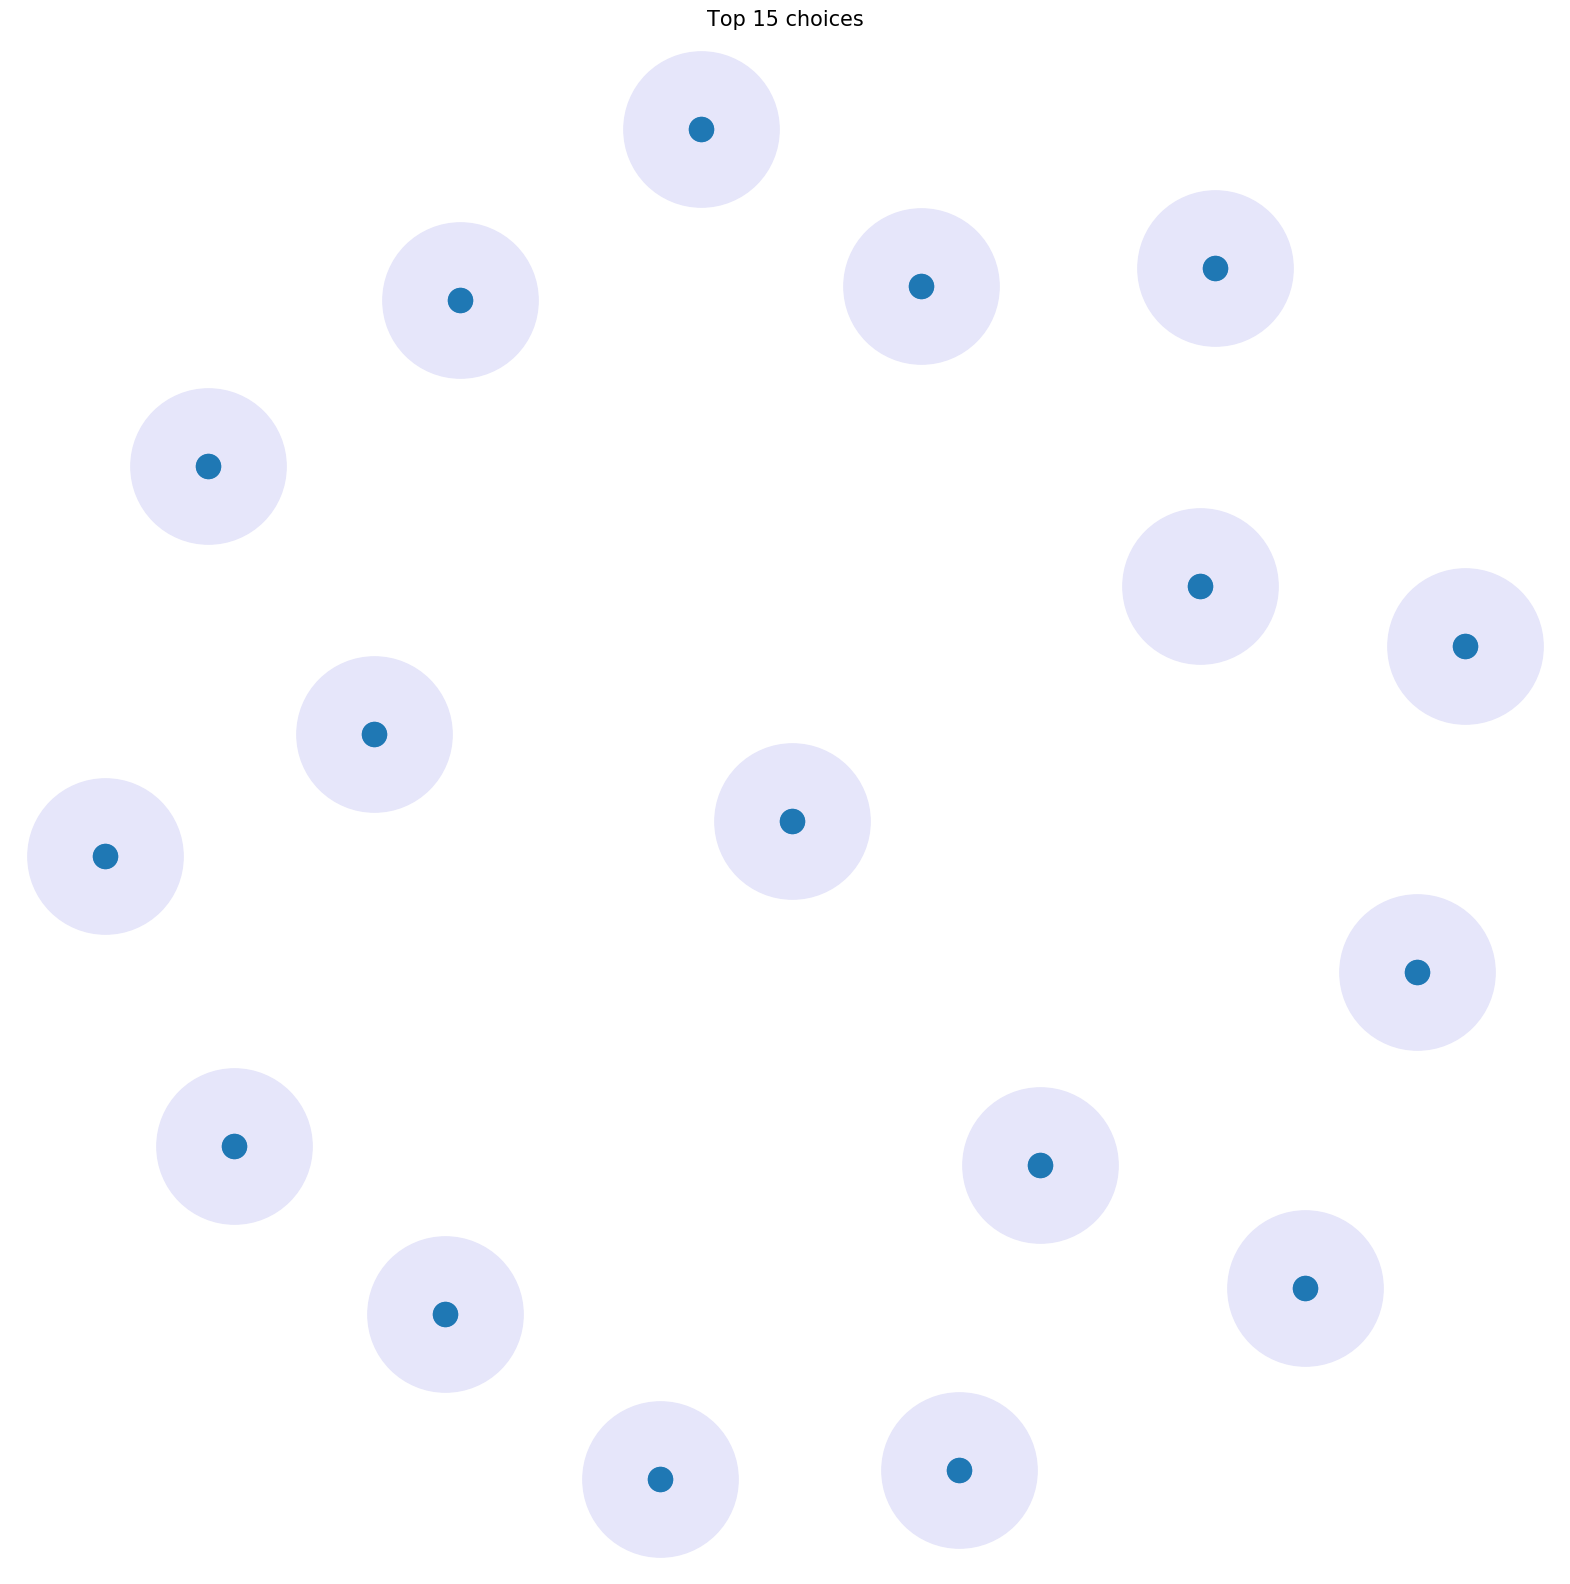

In [37]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(20,20)
first_choice=nx.from_pandas_edgelist(df_table_first,source="product",target="items",edge_attr=True)
pos=nx.spring_layout(first_choice)
nx.draw_networkx_nodes(first_choice,pos,node_size=12500,node_color="lavender")
nx.draw_networkx_nodes(first_choice,pos,width=3,alpha=0.6,edge_color="black")
nx.draw_networkx_nodes(first_choice,pos,font_size=18,font_family='sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 choices',fontsize=15)
plt.show()